# TensorFlow

## 【事前準備】

In [1]:
# scikit-learnの「set_config(display="diagram")」を使用するため、scikitlearnを最新verに更新
# !pip install scikit-learn==0.23.2 --target drive/My\ Drive/MyModule
# !pip install scikit-learn==0.23.2
# !pip install tensorflow==1.14
!pip list
## Google Drive上にインストールしたモジュールのインポート##
import sys
sys.path.append('/content/drive/My Drive/MyModule')

Package                      Version
---------------------------- -----------
absl-py                      1.4.0
alembic                      1.10.4
altair                       5.3.0
anyio                        3.6.2
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
arrow                        1.2.3
asttokens                    2.2.1
astunparse                   1.6.3
attrs                        22.2.0
Babel                        2.11.0
backcall                     0.2.0
beautifulsoup4               4.11.1
bleach                       6.0.0
blinker                      1.8.2
cachetools                   5.3.0
certifi                      2022.12.7
cffi                         1.15.1
charset-normalizer           3.0.1
click                        8.1.3
cmaes                        0.9.1
colorama                     0.4.6
colorlog                     6.7.0
comm                         0.1.2
contourpy                    1.0.7
cycler                       0.11.0



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
## モジュールのインポート ##
# 一般
import random
import math
# データ分析
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
matplotlib.style.use('ggplot')
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
# scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs
# 決定木可視化のためのツール
# import graphviz
# import pydotplus
from IPython.display import Image
# from sklearn.externals.six import StringIO
# TensorFlow
import tensorflow as tf   # tensorflow1系
# tf.enable_eager_execution()   # tensorflow1系
# import tensorflow.compat.v1 as tf   # tensorflow2系
# tf.disable_eager_execution()   # tensorflow2系

# Keras
from keras.datasets import mnist  # メモ: TensorFlow ver1.14をインストール時はkerasは使用不可
# その他
# from google.colab import drive #GoogleDriveモジュール
# drive.mount('/content/drive') #GoogleDriveのマウント

## 【問題1】スクラッチを振り返る
ここまでのスクラッチを振り返り、ディープラーニングを実装するためにはどのようなものが必要だったかを列挙してください。


（例）


- 重みを初期化する必要があった
- エポックのループが必要だった

それらがフレームワークにおいてはどのように実装されるかを今回覚えていきましょう。

### 【問題1 解答】
ディープラーニングを実装する際に必要な作業：

<u>事前検討</u>
- レイヤ構造（レイヤの種類・段数、ノード数）
- 初期化方式（SimpleInitializer / XavierInitializer / HeInitializer）
- 最適化方式（SGD / AdaGrad）
- ハイパーパラメータ（学習率、エポック数、バッチサイズ）
<br><br>

<u>実装</u>

●構成
- DNNクラスの実装

●初期化時の処理
- ハイパーパラメータの設定

●学習時の処理
- 各レイヤのインスタンス化
- 重みやバイアスの初期化
- 目的変数のOneHotEncoding
- エポック数分ループ
- イテレーション数ループ
 - 順伝播処理（出力値を算出）
 - 逆伝播処理（出力値から各レイヤの勾配および更新後のパラメータを算出）
 - 損失算出
- 学習曲線のプロット

●推定時
- 順伝播処理

## 【問題2】スクラッチとTensorFlowの対応を考える
以下のサンプルコードを見て、先ほど列挙した「ディープラーニングを実装するために必要なもの」がTensorFlowではどう実装されているかを確認してください。


それを簡単に言葉でまとめてください。単純な一対一の対応であるとは限りません。


《サンプルコード》


＊TensorFlow バージョン 2.4 で動作を確認済みです。

### ●Irisデータセット

In [5]:
# データセットの読み込み

# dataset_path = "drive/My Drive/DIVE INTO CODE/Sprint/Sprint13/Iris.csv"
df = pd.read_csv(dataset_path)

# データフレームから条件抽出
df = df[(df["Species"] == "Iris-versicolor")|(df["Species"] == "Iris-virginica")]
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = np.array(y)
X = np.array(X).astype(np.float32)

# ラベルを数値に変換
y[y=='Iris-versicolor'] = 0
y[y=='Iris-virginica'] = 1
y = y.astype(np.float32)[:, np.newaxis]

# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

display(df)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### ●GetMiniBatchクラス

In [6]:
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 10, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self.X = X[shuffle_index]
        self.y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
    def __len__(self):
        return self._stop
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self.X[p0:p1], self.y[p0:p1]        
    def __iter__(self):
        self._counter = 0
        return self
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self.X[p0:p1], self.y[p0:p1]

### ●MyModelクラス

In [7]:
class MyModel(tf.keras.Model):
    def __init__(self, seed=0):
        super().__init__()
        # 重みとバイアスの宣言
        self.w1 = tf.Variable(tf.random.normal([n_input, n_hidden1], seed=seed), trainable=True)
        self.w2 = tf.Variable(tf.random.normal([n_hidden1, n_hidden2], seed=seed), trainable=True)
        self.w3 = tf.Variable(tf.random.normal([n_hidden2, n_classes], seed=seed), trainable=True)
        self.b1 = tf.Variable(tf.random.normal([n_hidden1], seed=seed), trainable=True)
        self.b2 = tf.Variable(tf.random.normal([n_hidden2], seed=seed), trainable=True)
        self.b3 = tf.Variable(tf.random.normal([n_classes], seed=seed), trainable=True)
        
    def call(self, x):    # MyModelクラスのインスタンスの後ろに()を付けることで実行されるメソッド
        """
        単純な3層ニューラルネットワーク
        """
        layer_1 = tf.add(tf.matmul(x, self.w1), self.b1)
        layer_1 = tf.nn.relu(layer_1)
        layer_2 = tf.add(tf.matmul(layer_1, self.w2), self.b2)
        layer_2 = tf.nn.relu(layer_2)
        layer_output = tf.matmul(layer_2, self.w3) + self.b3  # tf.addと+は等価である
        return layer_output

### ●train関数・evaluate関数

In [8]:
def train(x, y):
    logits = model(x, training=True)    # メモ:training引数は学習時と推定時とで処理内容を分岐させる際に使用する引数。
                                        #      ここではMyModelのcallメソッド内でtraining引数を用いた分岐が未実装のため、意味無し。
    # print("logits:")
    # print(logits)
    loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(y, logits))
    return loss

def evaluate(x, y):
    logits = model(x)
    loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(y, logits))
    # 推定結果
    correct_pred = tf.equal(tf.sign(y - 0.5), tf.sign(tf.sigmoid(logits) - 0.5))
    # 指標値計算
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    return loss, accuracy

### ●学習・推定・評価

In [9]:
%%time
# ハイパーパラメータの設定
learning_rate = 0.01
batch_size = 10
num_epochs = 10
n_hidden1 = 50
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes = 1
# trainのミニバッチイテレータ
get_mini_batch_train = GetMiniBatch(X_train, y_train, batch_size=batch_size, seed=0)

# model = MyModel()
model = MyModel(seed=0)

# # 最適化手法
optimizer = tf.keras.optimizers.Adam(learning_rate)

# 計算グラフの実行
for epoch in range(num_epochs):
    # エポックごとにループ
    total_batch = np.ceil(X_train.shape[0]/batch_size).astype(np.int)
    total_loss = 0
    total_acc = 0
    for i, (mini_batch_x, mini_batch_y) in enumerate(get_mini_batch_train):
        # ミニバッチごとにループ
        with tf.GradientTape() as tape:
            loss = train(mini_batch_x, mini_batch_y)
        grads = tape.gradient(loss, model.trainable_weights)    # trainable_weightsに関するlossの勾配を算出
        optimizer.apply_gradients(zip(grads, model.trainable_weights))     # 勾配から重みを更新
        total_loss += loss
    loss = total_loss / n_samples
    val_loss, val_acc = evaluate(X_val, y_val)
    print("Epoch {}, loss : {:.4f}, val_loss : {:.4f}, val_acc : {:.3f}".format(epoch, loss, val_loss, val_acc))
_, test_acc = evaluate(X_test, y_test)
print("test_acc : {:.3f}".format(test_acc))

C:\Users\hhs20\AppData\Local\Temp\ipykernel_25960\203274920.py:21: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
<timed exec>:22: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional i

Epoch 0, loss : 5.5585, val_loss : 24.8139, val_acc : 0.375
Epoch 1, loss : 1.2153, val_loss : 9.1615, val_acc : 0.562
Epoch 2, loss : 1.0274, val_loss : 2.8046, val_acc : 0.875
Epoch 3, loss : 0.1035, val_loss : 3.8609, val_acc : 0.688
Epoch 4, loss : 0.1862, val_loss : 2.2632, val_acc : 0.875
Epoch 5, loss : 0.0692, val_loss : 6.1145, val_acc : 0.750
Epoch 6, loss : 0.3041, val_loss : 2.7296, val_acc : 0.750
Epoch 7, loss : 0.1135, val_loss : 9.3550, val_acc : 0.750
Epoch 8, loss : 0.5686, val_loss : 9.9539, val_acc : 0.500
Epoch 9, loss : 0.5061, val_loss : 6.3107, val_acc : 0.750
test_acc : 0.800
CPU times: total: 125 ms
Wall time: 558 ms


### 【問題2 解答】
問題1で列挙した各処理の、TensorFlowでの対応関係：

●構造
- DNNクラスの実装
```
tf.keras.MyModelクラスを継承したサブクラスを実装し、その中に重みWやバイアスB、callメソッド（順伝播処理）を実装。
```

●初期化時
- ハイパーパラメータの設定
```
クラスの外部で各ハイパーパラメータを定義しておき、TensorFlowの各メソッド（tf.keras.optimizers.Adamなど）で使用。
```

- 各レイヤのインスタンス化（InitializerやOptimizerのインスタンス化も含む）
```
tf.addやtf.matmu、tf.nn.relu等を用いて全結合層や活性化関数層を非常に少ない行数で実装。
```
- 重みやバイアスの初期化
```
MyModelクラスのコンストラクタ内で、tf.random.normalを用いてtf.Variableとして生成。
```
- 目的変数のOneHotEncoding
```
Irisデータセットの準備処理にて、OneHotエンコーディングではなくラベルエンコーディングが
目的変数に対して行われている。（多値分類ではなく２値分類だから？）
```
- エポック数分ループ
```
特記事項無し。
```
- イテレーション数ループ
```
特記事項無し。
```
 - 順伝播処理（出力値を算出）
 ```
 イテレーションのループ処理の中でMyModelクラスのインスタンスmodelの後ろに()を付けることで、
 MyModelクラス内のcallメソッドに実装した順伝播処理処を実行する。
```
 - 逆伝播処理（出力値から各レイヤの勾配および更新後のパラメータを算出）
 ```
 tf.GradientTapeクラスのgradientメソッドを実行することで、weightに関する損失lossの勾配を算出する。
 さらに、最適化手法のクラス（f.keras.optimizers.Adam）のapply_gradientsメソッドを用いて、
 勾配を基に重みを更新する。
 ```
 - 損失算出
 ```
 tf.nn.sigmoid_cross_entropy_with_logitsメソッドを用いて算出。（検証データに対しても同様）
```
- 学習曲線のプロット
```
本サンプルコードでは未実装。
```

●推定時
- 順伝播処理
```
学習時と同様に、MyModelクラスのcallメソッドにて実行する。
```

これまで扱ってきた小さなデータセットが他にもいくつかあります。上記サンプルコードを書き換え、これらに対して学習・推定を行うニューラルネットワークを作成してください。


- Iris（3種類すべての目的変数を使用）
- House Prices

どのデータセットも train, val, test の3種類に分けて使用してください。

## 【問題3】3種類すべての目的変数を使用したIrisのモデルを作成
Irisデータセットのtrain.csvの中で、目的変数Speciesに含まれる3種類すべてを分類できるモデルを作成してください。


- Iris Species


2クラスの分類と3クラス以上の分類の違いを考慮してください。それがTensorFlowでどのように書き換えられるかを公式ドキュメントなどを参考に調べてください。


《ヒント》


以下の2箇所は2クラス分類特有の処理です。
```
loss_op = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=logits))
correct_pred = tf.equal(tf.sign(Y - 0.5), tf.sign(tf.sigmoid(logits) - 0.5))
```

メソッドは以下のように公式ドキュメントを確認してください。


tf.nn.sigmoid_cross_entropy_with_logits  |  TensorFlow


tf.math.sign  |  TensorFlow


＊tf.signとtf.math.signは同じ働きをします。

### ●Irisデータセットver2（目的変数：3値）

In [8]:
# データセットの読み込み
# dataset_path ="Iris.csv"
dataset_path = "drive/My Drive/DIVE INTO CODE/Sprint/Sprint13/Iris.csv"
df2 = pd.read_csv(dataset_path)

# データフレームから条件抽出
# df = df[(df["Species"] == "Iris-versicolor")|(df["Species"] == "Iris-virginica")]
y = df2["Species"]
X = df2.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = np.array(y)
X = np.array(X).astype(np.float32)

# # ラベルエンコーディング
# y[y=='Iris-versicolor'] = 0
# y[y=='Iris-virginica'] = 1
# y[y=='Iris-setosa'] = 2
# y = y.astype(np.float32)[:, np.newaxis]

# One Hotエンコーディング
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_one_hot = enc.fit_transform(y[:, np.newaxis])

# trainとtestに分割
X_train, X_test1, y_train, y_test1 = train_test_split(X, y_one_hot, test_size=0.2, random_state=0)
# さらにtrainとvalに分割
X_train1, X_val1, y_train1, y_val1 = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

display(df2)

np.set_printoptions(threshold=10)    #ndarrayの要素の表示数上限を設定

print("y:")
print(y)
print(y.shape)
print("y_one_hot:")
print(y_one_hot)
print(y_one_hot.shape)
print(y_one_hot.dtype)
print("y_train1:")
print(y_train1.shape)
print("y_test1:")
print(y_test1.shape)
print("y_val1:")
print(y_val1.shape)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


y:
['Iris-setosa' 'Iris-setosa' 'Iris-setosa' ... 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica']
(150,)
y_one_hot:
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
(150, 3)
float64
y_train1:
(96, 3)
y_test1:
(30, 3)
y_val1:
(24, 3)


### ●MyModel2クラス

In [9]:
class MyModel2(tf.keras.Model):
    def __init__(self, n_input, n_hidden1, n_hidden2, n_classes, seed=0):
        super().__init__()
        # 重みとバイアスの宣言
        self.w1 = tf.Variable(tf.random.normal([n_input, n_hidden1], seed=seed), trainable=True)
        self.w2 = tf.Variable(tf.random.normal([n_hidden1, n_hidden2], seed=seed), trainable=True)
        self.w3 = tf.Variable(tf.random.normal([n_hidden2, n_classes], seed=seed), trainable=True)
        self.b1 = tf.Variable(tf.random.normal([n_hidden1], seed=seed), trainable=True)
        self.b2 = tf.Variable(tf.random.normal([n_hidden2], seed=seed), trainable=True)
        self.b3 = tf.Variable(tf.random.normal([n_classes], seed=seed), trainable=True)
        
    def call(self, x):    # MyModelクラスのインスタンスの後ろに()を付けることで実行されるメソッド
        """
        単純な3層ニューラルネットワーク
        """
        layer_1 = tf.add(tf.matmul(x, self.w1), self.b1)
        layer_1 = tf.nn.relu(layer_1)
        layer_2 = tf.add(tf.matmul(layer_1, self.w2), self.b2)
        layer_2 = tf.nn.relu(layer_2)
        layer_output = tf.matmul(layer_2, self.w3) + self.b3  # tf.addと+は等価である
        # layer_3 = tf.add(tf.matmul(layer_2, self.w3), self.b3)
        # layer_output = tf.nn.softmax(layer_3)
        return layer_output

### ●train2関数・evaluate2関数

In [10]:
def train2(x, y, model):
    logits = model(x, training=True)    # メモ:training引数は学習時と推定時とで処理内容を分岐させる際に使用する引数。
                                        #      ここではMyModelのcallメソッド内でtraining引数を用いた分岐が未実装のため、意味無し。
    # print("logits:")
    # print(logits)
    # loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(y, logits))   # sigmoid交差エントロピー算出
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, logits))   # softmax交差エントロピー算出
    return loss

def evaluate2(x, y, model):
    logits = model(x)
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, logits))
    # 推定結果
    # correct_pred = tf.equal(tf.sign(y - 0.5), tf.sign(tf.sigmoid(logits) - 0.5))
    # correct_pred = tf.nn.in_top_k(logits, y, 1)
    correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
    # 指標値計算
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    return loss, accuracy

### ●学習・推定・評価

In [11]:
%%time
X = X_train1
y = y_train1
Xv = X_val1
yv = y_val1
Xt = X_test1
yt = y_test1

# ハイパーパラメータの設定
learning_rate = 0.1
batch_size = 10
num_epochs = 10
n_input = X.shape[1]
n_hidden1 = 50
n_hidden2 = 100
n_samples = X.shape[0]
n_classes = 3
# trainのミニバッチイテレータ
get_mini_batch_train = GetMiniBatch(X, y, batch_size=batch_size, seed=0)

model = MyModel2(n_input, n_hidden1, n_hidden2, n_classes, seed=0)

# # 最適化手法
optimizer = tf.keras.optimizers.Adam(learning_rate)

# 計算グラフの実行
for epoch in range(num_epochs):
    # エポックごとにループ
    total_batch = np.ceil(X.shape[0]/batch_size).astype(np.int)
    total_loss = 0
    total_acc = 0
    for i, (mini_batch_x, mini_batch_y) in enumerate(get_mini_batch_train):
        # ミニバッチごとにループ
        with tf.GradientTape() as tape:
            loss = train2(mini_batch_x, mini_batch_y, model)    # lossを算出
        grads = tape.gradient(loss, model.trainable_weights)    # lossの値から、trainable_weightsに関するlossの勾配を算出
        optimizer.apply_gradients(zip(grads, model.trainable_weights))     # 勾配から更新後の重みを算出
        total_loss += loss
    loss = total_loss / n_samples
    val_loss, val_acc = evaluate2(Xv, yv, model)
    print("Epoch {}, loss : {:.4f}, val_loss : {:.4f}, val_acc : {:.3f}".format(epoch, loss, val_loss, val_acc))
_, test_acc = evaluate2(Xt, yt, model)
print("test_acc : {:.3f}".format(test_acc))

Epoch 0, loss : 14.0510, val_loss : 8.8950, val_acc : 0.708
Epoch 1, loss : 0.9482, val_loss : 6.1826, val_acc : 0.750
Epoch 2, loss : 0.0661, val_loss : 1.3988, val_acc : 0.875
Epoch 3, loss : 0.1919, val_loss : 0.9902, val_acc : 0.875
Epoch 4, loss : 0.1579, val_loss : 5.6600, val_acc : 0.750
Epoch 5, loss : 0.1291, val_loss : 0.3406, val_acc : 0.917
Epoch 6, loss : 0.0876, val_loss : 2.9579, val_acc : 0.917
Epoch 7, loss : 0.0652, val_loss : 3.7389, val_acc : 0.917
Epoch 8, loss : 0.0231, val_loss : 0.3958, val_acc : 0.875
Epoch 9, loss : 0.0683, val_loss : 1.7245, val_acc : 0.875
test_acc : 0.933
CPU times: user 1.03 s, sys: 33.3 ms, total: 1.06 s
Wall time: 1.08 s


## 【問題4】House Pricesのモデルを作成
回帰問題のデータセットであるHouse Pricesを使用したモデルを作成してください。


House Prices: Advanced Regression Techniques


この中のtrain.csvをダウンロードし、目的変数としてSalePrice、説明変数として、GrLivAreaとYearBuiltを使ってください。説明変数はさらに増やしても構いません。


分類問題と回帰問題の違いを考慮してください。

### ●住宅価格データセット

In [12]:
csv_path = "drive/My Drive/DIVE INTO CODE/Week3/train.csv" # ファイル名（パス）を指定する

import pandas as pd
df_train_org = pd.read_csv(csv_path)

# df_train = df_train_org.iloc[:10000, :]   #データ数を削減
df_train = df_train_org

#GrLivArea、YearBuilt、SalePrice列のみを抽出
df_train = df_train.loc[:, ["GrLivArea", "YearBuilt", "SalePrice"]]

pd.set_option('display.max_rows', 150)    #最大表示行数を設定
pd.set_option('display.max_columns', 5)   #最大表示列数を設定

display(df_train)

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000
...,...,...,...
1455,1647,1999,175000
1456,2073,1978,210000
1457,2340,1941,266500
1458,1078,1950,142125


,GrLivArea,YearBuilt,SalePrice
GrLivArea,1.000000,0.199010,0.708624
YearBuilt,0.199010,1.000000,0.522897
SalePrice,0.708624,0.522897,1.000000


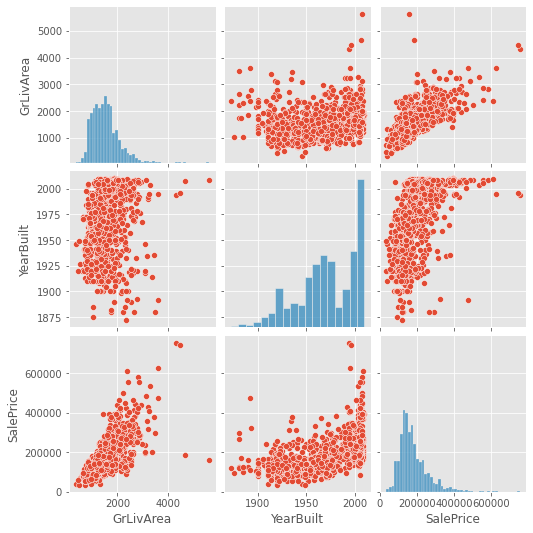

In [13]:
#相関係数
display(df_train.corr())

#散布図行列を作成
sns.pairplot(df_train, diag_kind="hist");

In [14]:
X = np.array(df_train.iloc[:, :-1])
y = np.array(df_train.iloc[:, -1])

# 標準化
scaler = StandardScaler()
scaler.fit(X)
X_transformed = scaler.transform(X)

#データセットを学習用と検証用に分割
X_train, X_test4, y_train, y_test4 = train_test_split(X_transformed, y, train_size = 0.8, random_state=0)
# さらにtrainとvalに分割
X_train4, X_val4, y_train4, y_val4 = train_test_split(X_train, y_train, train_size=0.8, random_state=0)

### ●MyModel3クラス

In [15]:
class MyModel3(tf.keras.Model):
    def __init__(self, n_input, n_hidden1, n_hidden2, n_classes, seed=0):
        super().__init__()
        # 重みとバイアスの宣言
        self.w1 = tf.Variable(tf.random.normal([n_input, n_hidden1], seed=seed), trainable=True)
        self.w2 = tf.Variable(tf.random.normal([n_hidden1, n_hidden2], seed=seed), trainable=True)
        self.w3 = tf.Variable(tf.random.normal([n_hidden2, n_classes], seed=seed), trainable=True)
        self.b1 = tf.Variable(tf.random.normal([n_hidden1], seed=seed), trainable=True)
        self.b2 = tf.Variable(tf.random.normal([n_hidden2], seed=seed), trainable=True)
        self.b3 = tf.Variable(tf.random.normal([n_classes], seed=seed), trainable=True)
        
    def call(self, x):    # MyModelクラスのインスタンスの後ろに()を付けることで実行されるメソッド
        """
        単純な3層ニューラルネットワーク
        """
        layer_1 = tf.add(tf.matmul(x, self.w1), self.b1)
        layer_1 = tf.nn.relu(layer_1)
        layer_2 = tf.add(tf.matmul(layer_1, self.w2), self.b2)
        layer_2 = tf.nn.relu(layer_2)
        layer_output = tf.matmul(layer_2, self.w3) + self.b3  # tf.addと+は等価である
        # layer_3 = tf.add(tf.matmul(layer_2, self.w3), self.b3)
        # layer_output = tf.nn.softmax(layer_3)
        return layer_output

### ●train3関数・evaluate3関数

In [16]:
def train3(x, y, model):
    logits = model(x, training=True)    # メモ:training引数は学習時と推定時とで処理内容を分岐させる際に使用する引数。
                                        #      ここではMyModelのcallメソッド内でtraining引数を用いた分岐が未実装のため、意味無し。
    # print("logits:")
    # print(logits)
    # loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(y, logits))   # sigmoid交差エントロピー算出（２値分類用）
    # loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, logits))   # softmax交差エントロピー算出（多値分類用）
    loss = tf.sqrt(tf.reduce_mean(tf.square(y - logits)))    # RMSE（線形回帰用）
    return loss

def evaluate3(x, y, model):
    logits = model(x)
    loss = tf.sqrt(tf.reduce_mean(tf.square(y - logits)))    # RMSE（線形回帰用）
    # 推定結果
    # correct_pred = tf.equal(tf.sign(y - 0.5), tf.sign(tf.sigmoid(logits) - 0.5))   # sigmoid交差エントロピー算出（２値分類用）
    # correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))   # softmax交差エントロピー算出（多値分類用）
    # 指標値計算
    # accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))  #（分類用）
    return loss

### ●学習・推定・評価

In [17]:
%%time
X = X_train4
y = y_train4
Xv = X_val4
yv = y_val4
Xt = X_test4
yt = y_test4

# ハイパーパラメータの設定
learning_rate = 0.1
batch_size = 10
num_epochs = 10
n_input = X.shape[1]
n_hidden1 = 50
n_hidden2 = 100
n_samples = X.shape[0]
n_classes = 1
# trainのミニバッチイテレータ
get_mini_batch_train = GetMiniBatch(X, y, batch_size=batch_size, seed=0)

model = MyModel3(n_input, n_hidden1, n_hidden2, n_classes, seed=0)

# # 最適化手法
optimizer = tf.keras.optimizers.Adam(learning_rate)

# 計算グラフの実行
for epoch in range(num_epochs):
    # エポックごとにループ
    total_batch = np.ceil(X.shape[0]/batch_size).astype(np.int)
    total_loss = 0
    total_acc = 0
    for i, (mini_batch_x, mini_batch_y) in enumerate(get_mini_batch_train):
        # ミニバッチごとにループ
        with tf.GradientTape() as tape:
            loss = train3(mini_batch_x, mini_batch_y, model)
        grads = tape.gradient(loss, model.trainable_weights)    # trainable_weightsに関するlossの勾配を算出
        optimizer.apply_gradients(zip(grads, model.trainable_weights))     # 勾配から重みを更新
        total_loss += loss
    loss = total_loss / n_samples
    # val_loss, val_acc = evaluate3(Xv, yv, model)    # 分類用
    val_loss = evaluate3(Xv, yv, model)   # 回帰用
    # print("Epoch {}, loss : {:.4f}, val_loss : {:.4f}, val_acc : {:.3f}".format(epoch, loss, val_loss, val_acc))   # 分類用
    print("Epoch {}, loss(rmse) : {:.4f}, val_loss(rmse) : {:.4f}".format(epoch, loss, val_loss))   # 回帰用
test_rmse = evaluate3(Xt, yt, model)
print("test_mse : {:.3f}".format(test_rmse))

Epoch 0, loss(rmse) : 11333.2812, val_loss(rmse) : 77177.0938
Epoch 1, loss(rmse) : 7567.9458, val_loss(rmse) : 75752.5703
Epoch 2, loss(rmse) : 7530.4849, val_loss(rmse) : 75635.3828
Epoch 3, loss(rmse) : 7526.1382, val_loss(rmse) : 75604.0547
Epoch 4, loss(rmse) : 7523.9829, val_loss(rmse) : 75602.3047
Epoch 5, loss(rmse) : 7521.9839, val_loss(rmse) : 75583.0547
Epoch 6, loss(rmse) : 7519.9761, val_loss(rmse) : 75575.4922
Epoch 7, loss(rmse) : 7519.7593, val_loss(rmse) : 75571.2891
Epoch 8, loss(rmse) : 7518.8066, val_loss(rmse) : 75568.4688
Epoch 9, loss(rmse) : 7518.3213, val_loss(rmse) : 75569.0078
test_mse : 85237.891
CPU times: user 6.62 s, sys: 155 ms, total: 6.77 s
Wall time: 6.7 s


##【問題5】MNISTのモデルを作成
ニューラルネットワークのスクラッチで使用したMNISTを分類するモデルを作成してください。


3クラス以上の分類という点ではひとつ前のIrisと同様です。入力が画像であるという点で異なります。


スクラッチで実装したモデルの再現を目指してください。

### ●MNISTのデータセット

In [18]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape) # (60000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(X_train[0].dtype) # uint8
print(X_train[0])

# # 各画像のピクセルデータを平滑化（28x28 ⇒ 784x1）
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

(60000, 28, 28)
(10000, 28, 28)
uint8
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


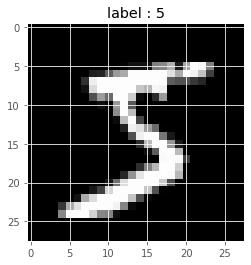

In [19]:
## 画像を可視化 ##
index = 0
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

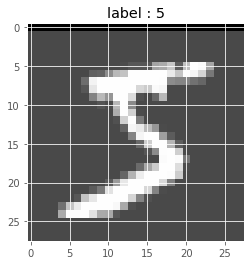

[[-105.35 -105.35 -105.35 ... -105.35 -105.35 -105.35]
 [   0.      0.      0.   ...    0.      0.      0.  ]
 [   0.      0.      0.   ...    0.      0.      0.  ]
 ...
 [   0.      0.      0.   ...    0.      0.      0.  ]
 [   0.      0.      0.   ...    0.      0.      0.  ]
 [   0.      0.      0.   ...    0.      0.      0.  ]]


In [20]:
index = 0
image = X_train[index].reshape(28,28)
image = image.astype(np.float) # float型に変換
# image -= 105.35 # 意図的に負の小数値を作り出してみる
image[0] = -105.35 # 意図的に負の小数値を作り出してみる

# 自動スケーリングあり
plt.imshow(image, 'gray')   # 最小値が0となるように自動的にスケーリングされる
plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image[:10]) # 値を確認

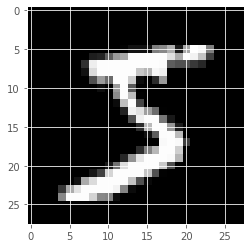

In [21]:
# 自動スケーリング無し
plt.imshow(image, 'gray', vmin = 0, vmax = 255);   # 範囲外の値は0 or 255に置換される (自動スケールされない)

In [22]:
## 画像データを正規化 ##
X_train_transformed = X_train.astype(np.float) / 255
X_test_transformed = X_test.astype(np.float) / 255
# scaler = MinMaxScaler()
# scaler.fit(X_train)
# X_train_transformed = scaler.transform(X_train)
# X_test_transformed = scaler.transform(X_test)
# print(X_train_transformed.max()) # 1.0
# print(X_test_transformed.min()) # 0.0

In [23]:
## One Hot Encoding ##
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64
print(y_train)
print(y_train_one_hot)

(60000,)
(60000, 10)
float64
[5 0 4 ... 5 6 8]
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [24]:
# X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train_transformed, y_train, train_size=0.8, random_state=0)
# print(X_train1.shape) # (48000, 784)
# print(X_test1.shape) # (12000, 784)
# print(y_train1.shape) # (48000,)
# print(y_test1.shape) # (12000,)

X_train5, X_val5, y_train5, y_val5 = train_test_split(X_train_transformed, y_train_one_hot, train_size=0.99, random_state=0)
X_test5 = X_test_transformed
y_test5 = y_test_one_hot
# X_train5 = X_train5[:, np.newaxis, :, :]    # サンプルの列の次にチャネルの列を追加（チャネル数=1）
# X_test5 = X_test5[:, np.newaxis, :, :]    # サンプルの列の次にチャネルの列を追加（チャネル数=1）
# X_test5 = X_val5[:, np.newaxis, :, :]    # サンプルの列の次にチャネルの列を追加（チャネル数=1）
print(X_train5.shape)
print(X_test5.shape)
print(X_val5.shape)
print(y_train5.shape)
print(y_test5.shape)
print(y_val5.shape)

# X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train_transformed[:6000, :], y_train[:6000], train_size=0.8, random_state=0)
# X_train2 = X_train2[:, np.newaxis, :, :]    # サンプルの列の次にチャネルの列を追加（チャネル数=1）
# X_test2 = X_test2[:, np.newaxis, :, :]    # サンプルの列の次にチャネルの列を追加（チャネル数=1）
# print(X_train2.shape) # (4800, 784)
# print(X_test2.shape) # (1200, 784)
# print(y_train2.shape) # (4800,)
# print(y_test2.shape) # (1200,)


(59400, 784)
(10000, 784)
(600, 784)
(59400, 10)
(10000, 10)
(600, 10)


### ●MyModel4クラス

In [25]:
class MyModel4(tf.keras.Model):
    def __init__(self, n_input, n_hidden1, n_hidden2, n_classes, seed=0):
        super().__init__()
        # 重みとバイアスの宣言
        self.w1 = tf.Variable(tf.random.normal([n_input, n_hidden1], seed=seed), trainable=True)
        self.w2 = tf.Variable(tf.random.normal([n_hidden1, n_hidden2], seed=seed), trainable=True)
        self.w3 = tf.Variable(tf.random.normal([n_hidden2, n_classes], seed=seed), trainable=True)
        self.b1 = tf.Variable(tf.random.normal([n_hidden1], seed=seed), trainable=True)
        self.b2 = tf.Variable(tf.random.normal([n_hidden2], seed=seed), trainable=True)
        self.b3 = tf.Variable(tf.random.normal([n_classes], seed=seed), trainable=True)
        
    def call(self, x):    # MyModelクラスのインスタンスの後ろに()を付けることで実行されるメソッド
        """
        単純な3層ニューラルネットワーク
        """
        layer_1 = tf.add(tf.matmul(x, self.w1), self.b1)
        layer_1 = tf.nn.relu(layer_1)
        layer_2 = tf.add(tf.matmul(layer_1, self.w2), self.b2)
        layer_2 = tf.nn.relu(layer_2)
        layer_output = tf.matmul(layer_2, self.w3) + self.b3  # tf.addと+は等価である
        # layer_3 = tf.add(tf.matmul(layer_2, self.w3), self.b3)
        # layer_output = tf.nn.softmax(layer_3)
        return layer_output

### ●train4関数・evaluate4関数

In [26]:
def train4(x, y, model):
    logits = model(x, training=True)    # メモ:training引数は学習時と推定時とで処理内容を分岐させる際に使用する引数。
                                        #      ここではMyModelのcallメソッド内でtraining引数を用いた分岐が未実装のため、意味無し。
    # print("logits:")
    # print(logits)
    # loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(y, logits))   # sigmoid交差エントロピー算出
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, logits))   # softmax交差エントロピー算出
    return loss

def evaluate4(x, y, model):
    logits = model(x)
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, logits))
    # 推定結果
    # correct_pred = tf.equal(tf.sign(y - 0.5), tf.sign(tf.sigmoid(logits) - 0.5))
    # correct_pred = tf.nn.in_top_k(logits, y, 1)
    correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
    # 指標値計算
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    return loss, accuracy

### ●学習・推定・評価

In [31]:
%%time
X = X_train5
y = y_train5
Xv = X_val5
yv = y_val5
Xt = X_test5
yt = y_test5

# ハイパーパラメータの設定
learning_rate = 0.01
batch_size = 20
num_epochs = 3
n_input = X.shape[1]
n_hidden1 = 400
n_hidden2 = 200
n_samples = X.shape[0]
n_classes = 10
# trainのミニバッチイテレータ
get_mini_batch_train = GetMiniBatch(X, y, batch_size=batch_size, seed=0)

model = MyModel4(n_input, n_hidden1, n_hidden2, n_classes, seed=0)

# # 最適化手法
optimizer = tf.keras.optimizers.Adam(learning_rate)

# 計算グラフの実行
for epoch in range(num_epochs):
    # エポックごとにループ
    total_batch = np.ceil(X.shape[0]/batch_size).astype(np.int)
    total_loss = 0
    total_acc = 0
    for i, (mini_batch_x, mini_batch_y) in enumerate(get_mini_batch_train):
        # ミニバッチごとにループ
        with tf.GradientTape() as tape:
            loss = train4(mini_batch_x, mini_batch_y, model)    # lossを算出
        grads = tape.gradient(loss, model.trainable_weights)    # lossの値から、trainable_weightsに関するlossの勾配を算出
        optimizer.apply_gradients(zip(grads, model.trainable_weights))     # 勾配から更新後の重みを算出
        total_loss += loss
    loss = total_loss / n_samples
    val_loss, val_acc = evaluate4(Xv, yv, model)
    print("Epoch {}, loss : {:.4f}, val_loss : {:.4f}, val_acc : {:.3f}".format(epoch, loss, val_loss, val_acc))
_, test_acc = evaluate4(Xt, yt, model)
print("test_acc : {:.3f}".format(test_acc))

Epoch 0, loss : 1.2848, val_loss : 0.9846, val_acc : 0.742
Epoch 1, loss : 0.0481, val_loss : 0.7293, val_acc : 0.822
Epoch 2, loss : 0.0425, val_loss : 0.6076, val_acc : 0.828
test_acc : 0.817
CPU times: user 2min 5s, sys: 5.37 s, total: 2min 10s
Wall time: 1min 55s
